# Итоговая работа по курсу "Python для анализа данных"

## Задание:

1. Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для переменных.
4. Визуализировать несколько взаимосвязей между переменными.
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6. Рассчитать сколько работников работает в каждом департаменте.
7. Показать распределение сотрудников по зарплатам.
8. Показать распределение сотрудников по зарплатам совместно с департаментами.
9. Сколько сотрудников покинули компанию.
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import numpy as np
import scipy.stats as sts


### 1. Загрузить файл hr.csv

In [74]:
data = pd.read_csv('hr.csv')
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


Посмотрим на названия столбцов:
- satisfaction_level - уровень удовлетворенности (непрерывная величина, принимает значение от 0 до 1)
- last_evaluation - последняя оценка (непрерывная величина, принимает значение от 0 до 1)
- number_project - количество проектов
- average_monthly_hours - среднее количество отработанных часов за месяц
- time_spend_company - время, проведенное в компании
- work_accident - несчастный случай на работе (0 - несчастного случая не было, 1 - несчастный случай был)
- left - покинул компанию (0 - работает, 1 - покинул компанию)
- promotion_last_5years - повышение за последние 5 лет (0 - повышения не было, 1 - повышение было)
- sales - отдел (sales, accounting, hr, technical, support, managment, IT, Product_mng, marketing, RandD)
- salary - зарплата (low, medium, high)

In [75]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [76]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Датасет состоит из 14999 строк, значений NaN нет

### 2. Расчитаем основные статистики для переменных

In [78]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [79]:
print('Мода атрибута satisfaction_level: ', statistics.mode(data['satisfaction_level']))

Мода атрибута satisfaction_level:  0.1


In [80]:
print('Мода атрибута last_evaluation: ', statistics.mode(data['last_evaluation']))

Мода атрибута last_evaluation:  0.55


In [81]:
print('Мода атрибута number_project: ', statistics.mode(data['number_project']))

Мода атрибута number_project:  4


In [82]:
print('Мода атрибута average_montly_hours: ', statistics.mode(data['average_montly_hours']))

StatisticsError: no unique mode; found 2 equally common values

Для атрибута average_montly_hours нельзя посчитать моду, так как нет одного значения, которое встречается чаще других (существует два таких значения)

In [83]:
print('Мода атрибута time_spend_company: ', statistics.mode(data['time_spend_company']))

Мода атрибута time_spend_company:  3


In [84]:
print('Мода атрибута Work_accident: ', statistics.mode(data['Work_accident']))

Мода атрибута Work_accident:  0


In [85]:
print('Мода атрибута left: ', statistics.mode(data['left']))

Мода атрибута left:  0


In [86]:
print('Мода атрибута promotion_last_5years: ', statistics.mode(data['promotion_last_5years']))

Мода атрибута promotion_last_5years:  0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2706c650>,
      dtype=object)

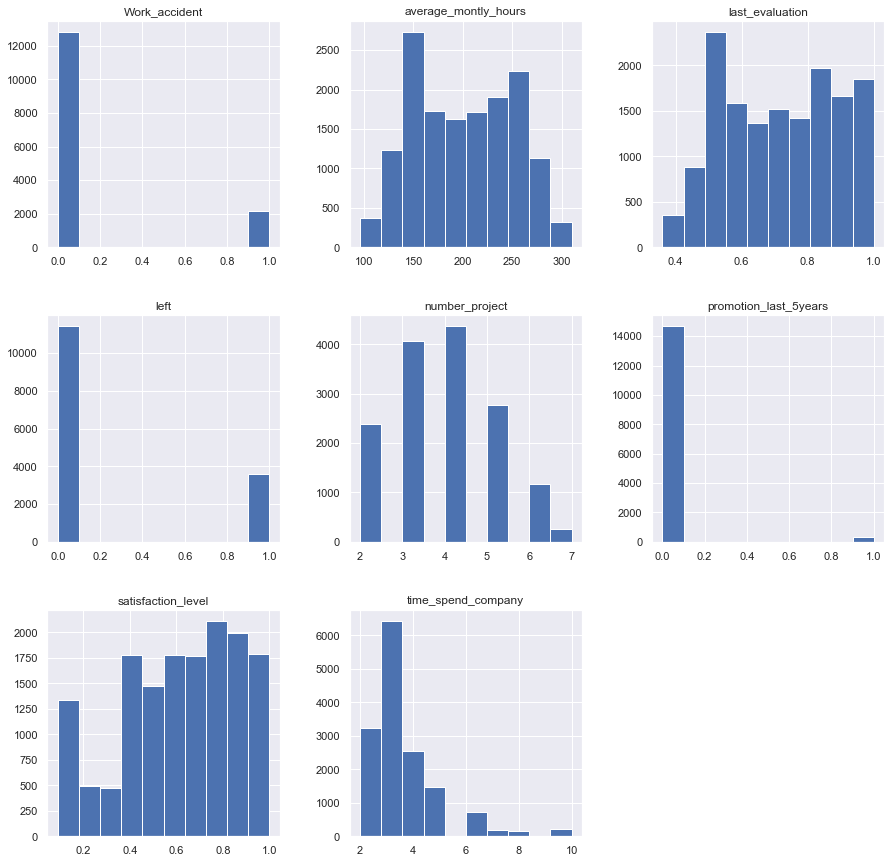

In [87]:
data.hist(figsize=(15,15))

Основные выводы, которые можно сделать из рассчитанных величин и визуализации:
- в основном люди работают в компании по 3 года до увольнения 
- в компании очень мало людей, кооторые получили повышение 
- также можно отметить довольно большое количество людей с очень низким уровнем удовлетворенности (уровень 0,1)
- работающих людей больше, чем уволенных
- несчастные случаи на работе случаются (их не так уж и мало)

### 3. Рассчитать и визуализировать матрицу корреляций

In [88]:
corr_matrix = data.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


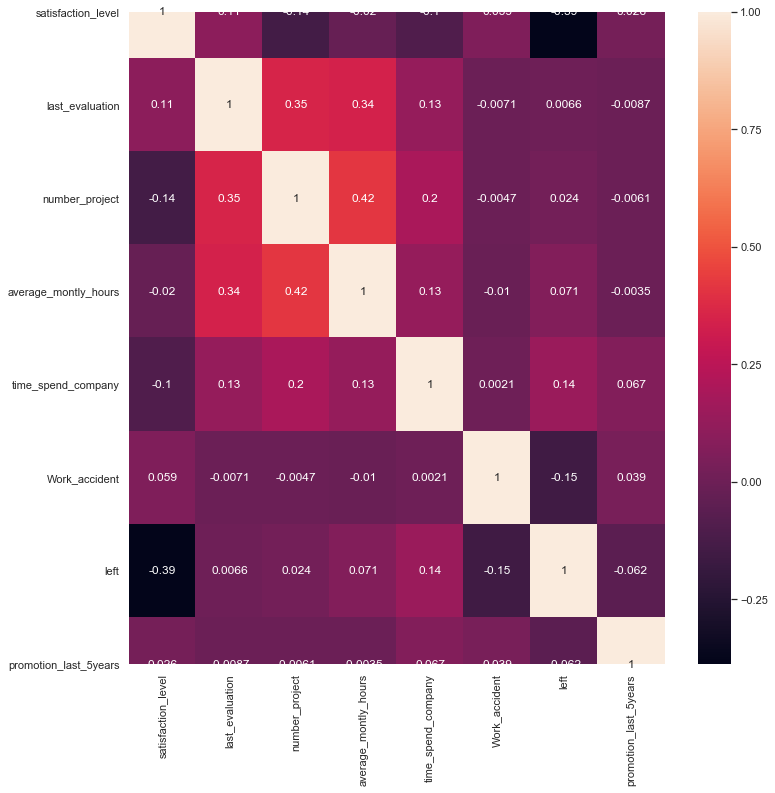

In [91]:
sns.set(rc=({'figure.figsize':(12, 12)}))
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)

Выводы из матрицы корреляций: нет величин, которые значительно коррелируют между сосбой

### 4. Визуализация взаимосвязей между переменными

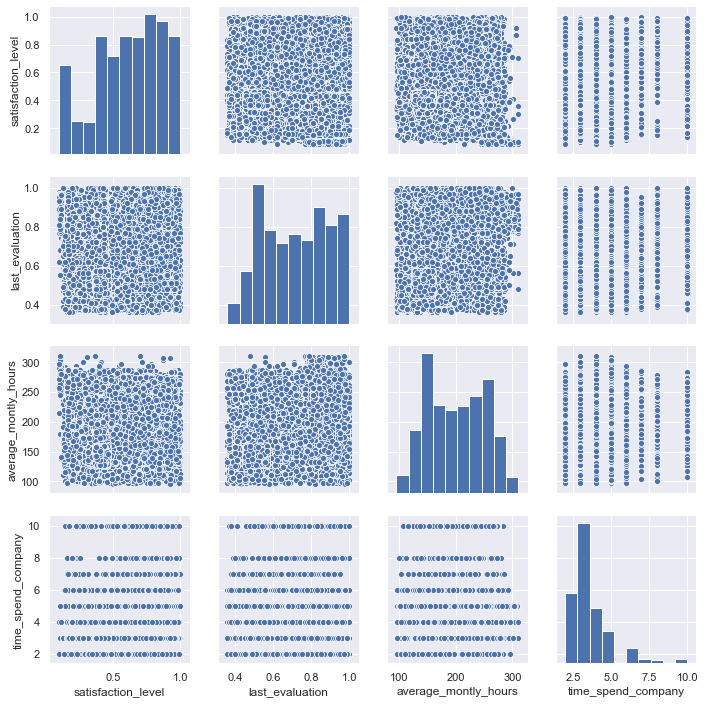

In [19]:
sns.pairplot(data, vars=['satisfaction_level','last_evaluation','average_montly_hours', 'time_spend_company'], kind="scatter")

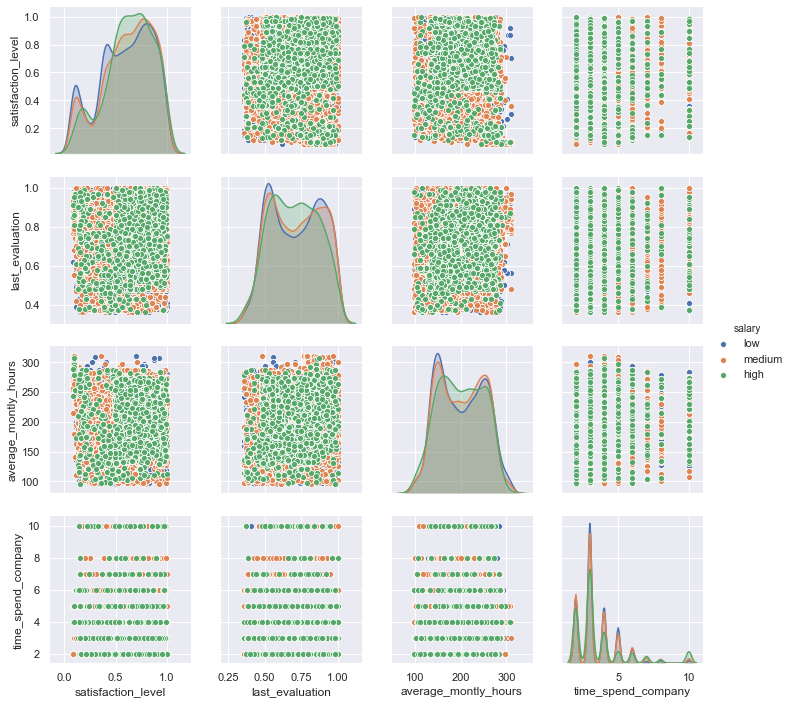

In [20]:
sns.pairplot(data, vars=['satisfaction_level','last_evaluation','average_montly_hours', 'time_spend_company'], hue = 'salary', kind="scatter")

Как и из матрицы корреляций, из данных графиков трудно сделать вывод о какой бы то ни было корреляции между переменными.

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

#### Гипотеза 1: люди, покинувшие компанию имеют такой же уровень удовлетворенности по сравнению с работающими сотрудниками (двухвыборочный t - критерий)

In [21]:
people_left = data[data['left'] == 1]['satisfaction_level']
people_work = data[data['left'] == 0]['satisfaction_level']

In [22]:
sts.shapiro(data['satisfaction_level'])

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9518948793411255, 0.0)

In [23]:
len(people_left), len(people_work)

(3571, 11428)

In [24]:
people_left.mean(), people_work.mean()

(0.44009801176140917, 0.666809590479516)

In [25]:
people_work = people_work.sample(n = 3571)

In [26]:
statistics.variance(people_left), statistics.variance(people_work)

(0.06966085873834273, 0.045977021885763546)

In [27]:
sts.ttest_ind(people_left, people_work, equal_var=False)

Ttest_indResult(statistic=-39.18016648797654, pvalue=3.7060176409568135e-303)

Так как p-value < 0,05, то можем отвергнуть нулевую гипотезу о том, что уровень удовлетворенности у уволенных сотрудников такой же, как у работающих. Существует статистическая разница между уровнем удовлетворенности уволенных и работающих сотрудников, в среднем у уволенных сотрудников уровень удовлетворенности ниже.

#### Гипотеза 2 - сотрудники, с которыми произошел несчастный случай на работе в среднем отрабатывают такое же количество часов в месяц как и все (одновыборочный t-критерий)

In [92]:
sts.shapiro(data['average_montly_hours'])

(0.963361382484436, 0.0)

In [93]:
data['average_montly_hours'].mean()

201.0503366891126

In [94]:
people_accident = data[data['Work_accident'] == 1]['average_montly_hours']
people_accident.mean()

199.81834946980175

In [95]:
len(people_accident)

2169

In [96]:
sts.ttest_1samp(people_accident, data['average_montly_hours'].mean())

Ttest_1sampResult(statistic=-1.2180984929225762, pvalue=0.2233190918506802)

Так как p-value > 0,05, то можем сделать вывод, что наша гипотеза верна и нет статистического отличия между средним временем работы сотрудников, с которыми произошел несчастный случай, и всеми остальными.

### 6. Рассчитать сколько работников работает в каждом департаменте

In [97]:
data.groupby('sales').count()['salary']

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64

Если брать во внимание только работающих сотрудников, то получим:

In [98]:
data[data['left'] == 0].groupby('sales').count()['salary']

sales
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: salary, dtype: int64

### 7. Показать распределение сотрудников по зарплатам

Все сотрудники (с учетом уволенных):

In [99]:
data.groupby('salary').count()['sales']

salary
high      1237
low       7316
medium    6446
Name: sales, dtype: int64

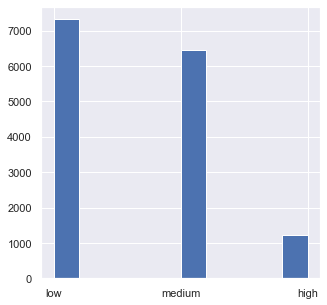

In [100]:
data['salary'].hist(figsize= (5,5))

Только работающие сотрудники:

In [101]:
data[data['left'] == 0].groupby('salary').count()['sales']

salary
high      1155
low       5144
medium    5129
Name: sales, dtype: int64

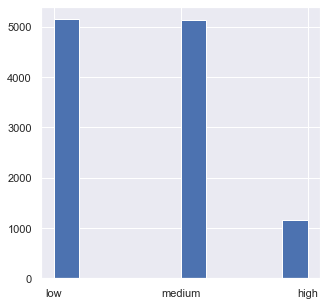

In [102]:
data_1 = data[data['left'] == 0]
data_1['salary'].hist(figsize= (5,5))

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [103]:
pivot_data = data.pivot_table(index = 'sales', columns = 'salary', values = 'satisfaction_level', 
                              aggfunc = 'count', fill_value = 0)
pivot_data

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


Text(0.5, 1.0, 'Распределение сотрудников по зарплатам и отделам (с учетом уволенных)')

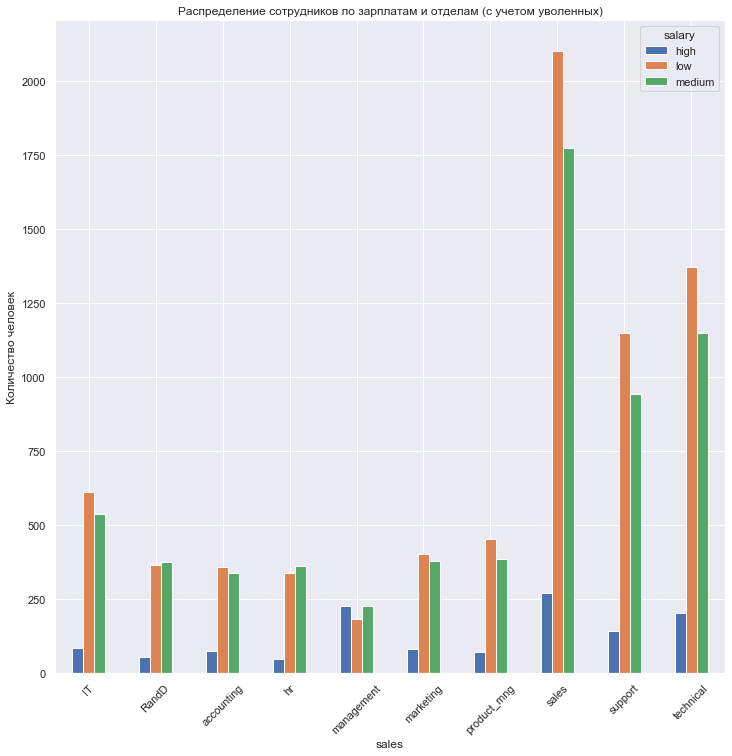

In [104]:
pivot_data.plot(kind='bar', rot=45)
plt.ylabel('Количество человек')
plt.title('Распределение сотрудников по зарплатам и отделам (с учетом уволенных)')

Если брать во внимание только работающих сотрудников, то получим:

In [105]:
pivot_data_real = data[data['left'] == 0].pivot_table(index = 'sales', columns = 'salary',
                                                      values = 'satisfaction_level',aggfunc = 'count', 
                                                      fill_value = 0)
pivot_data_real

salary,high,low,medium
sales,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


Text(0.5, 1.0, 'Распределение работающих сотрудников по зарплатам и отделам')

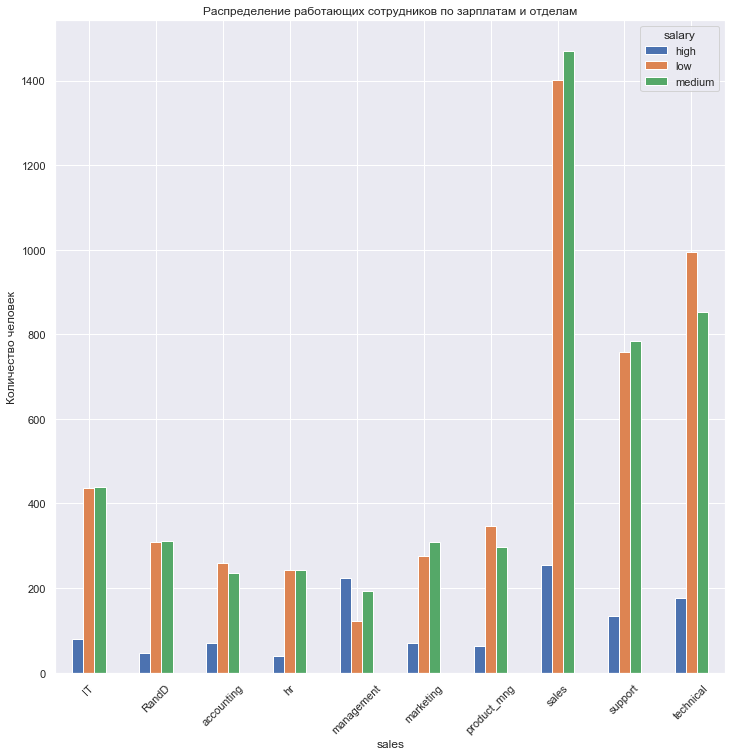

In [106]:
pivot_data_real.plot(kind='bar', rot=45)
plt.ylabel('Количество человек')
plt.title('Распределение работающих сотрудников по зарплатам и отделам')

### 9. Сколько сотрудников покинули компанию

In [107]:
len(data[data['left'] == 1])

3571

In [108]:
pivot_data_left = data[data['left'] == 1].pivot_table(index = 'sales', columns = 'salary',
                                                      values = 'satisfaction_level',aggfunc = 'count', 
                                                      fill_value = 0)
pivot_data_left 

salary,high,low,medium
sales,,,
IT,4,172,97
RandD,4,55,62
accounting,5,99,100
hr,6,92,117
management,1,59,31
marketing,9,126,68
product_mng,6,105,87
sales,14,697,303
support,8,389,158


Text(0.5, 1.0, 'Распределение уволенных сотрудников по зарплатам и отделам')

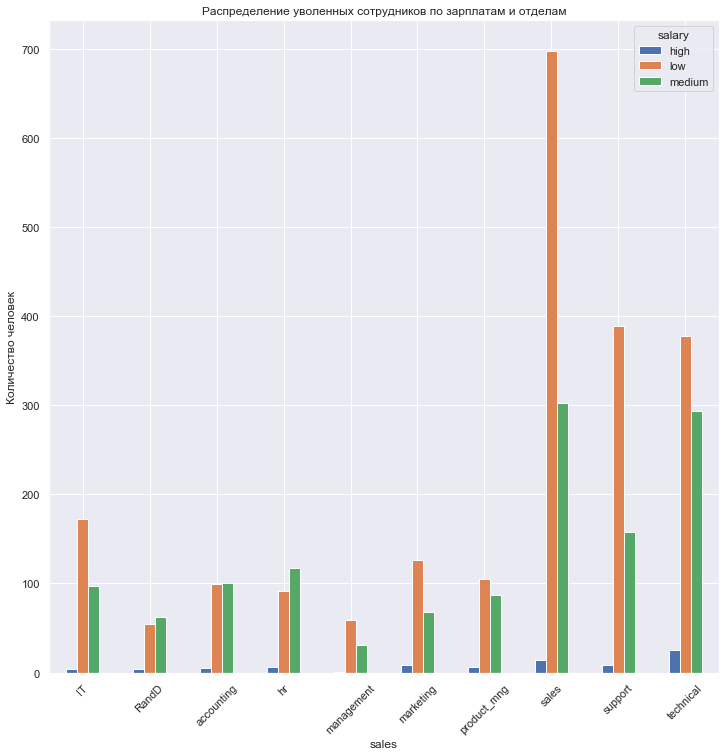

In [109]:
pivot_data_left.plot(kind='bar', rot=45)
plt.ylabel('Количество человек')
plt.title('Распределение уволенных сотрудников по зарплатам и отделам')

### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

#### Гипотеза 1: Сотрудники покидают компанию из-за низкого уровня зарплаты

Сравним две группы людей: сотрудников с уровнем зарплаты low и сотрудником с уровнем зарплаты medium или high

In [110]:
low_salary = data[data['salary'] == 'low']['left']
not_low_salary = data[data['salary'] != 'low']['left']

In [111]:
len(low_salary), len(not_low_salary)

(7316, 7683)

Количество человек, которые покинули компанию, с уровнем зарплаты low:

In [112]:
len(data[(data['salary'] == 'low') & (data['left'] == 1)])

2172

Количество человек, которые покинули компанию, с уровнем зарплаты medium или high:

In [113]:
len(data[(data['salary'] != 'low') & (data['left'] == 1)])

1399

Используем критерий Манна-Уитни для того чтобы понять, есть ли статистическое различие между группой уволенных людей с низкой зарплатой и группой уволенных людей с более высокими зарплатами:

In [114]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(low_salary, not_low_salary)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=24878218.000, p=0.000
Probably different distributions


Тест показал, что статистически различия существуют, а значит можно говорить о том, что люди с уровнем зарплаты low чаще покидают компанию.

#### Гипотеза 2: Сотрудники покидают компанию из-за низкого уровня удовлетворенности

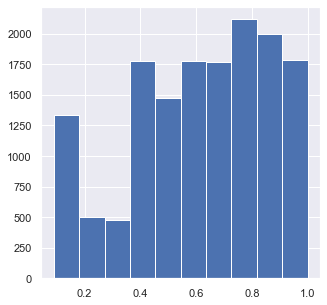

In [51]:
data['satisfaction_level'].hist(figsize = (5,5))

In [52]:
data['satisfaction_level'].mean()

0.6128335222348166

Будем считать уровень удовлетворенности низким, если он меньше среднего значения 0.61

In [53]:
low_level = data[data['satisfaction_level'] < 0.61]['left']
high_level = data[data['satisfaction_level'] >= 0.61]['left']

Количество человек, которые покинули компанию и имели уровень удовлетворенности ниже среднего:

In [54]:
len(data[(data['satisfaction_level'] < 0.61) & (data['left'] == 1)])

2600

Количество человек, которые покинули компанию и имели уровень удовлетворенности выше среднего:

In [55]:
len(data[(data['satisfaction_level'] >= 0.61) & (data['left'] == 1)])

971

Используем критерий Манна-Уитни для того чтобы понять, есть ли статистическое различие между группой уволенных людей с низким уровнем удовлетворенности и группой уволенных людей с высоким уровнем:

In [56]:
stat, p = mannwhitneyu(low_level, high_level)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=20340344.500, p=0.000
Probably different distributions


Тест показал, что статистически различия существуют, а значит можно говорить о том, что люди с низким уровнем удовлетворенности чаще покидают компанию.

#### Гипотеза 3: Сотрудники покидают компанию из-за высокой рабочей загрузки

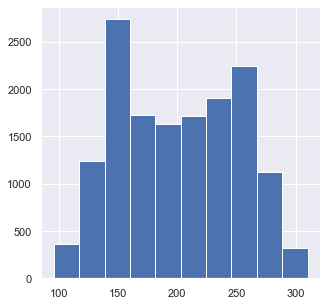

In [57]:
data['average_montly_hours'].hist(figsize = (5,5))

In [58]:
data['average_montly_hours'].mean()

201.0503366891126

Будем считать уровень загруженности высоким, если он выше среднего значения 201:

In [115]:
easy_work = data[data['average_montly_hours'] < 201]['left']
high_work = data[data['average_montly_hours'] >= 201]['left']

Количество человек, которые покинули компаниию, и работали с обычной загрузкой:

In [116]:
len(data[(data['average_montly_hours'] < 201) & (data['left'] == 1)])

1656

Количество человек, которые покинули компаниию, и работали с высокой загрузкой:

In [117]:
len(data[(data['average_montly_hours'] >= 201) & (data['left'] == 1)])

1915

Используем критерий Манна-Уитни для того чтобы понять, есть ли статистическое различие между группой уволенных людей с низким уровнем загруженности и группой уволенных людей с высоким уровнем:

In [72]:
stat, p = mannwhitneyu(easy_work, high_work )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=27106020.000, p=0.000
Probably different distributions


Тест показал, что статистически различия существуют, а значит можно говорить о том, что люди с высоким уровнем загруженности чаще покидают компанию.